In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
ticker = 'PG'  
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

In [3]:
log_returns = np.log(1 + data.pct_change())

In [4]:
log_returns.tail()

,PG
Date,
2017-03-15,0.004386
2017-03-16,0.000438
2017-03-17,-0.004824
2017-03-20,0.002415
2017-03-21,-0.000329


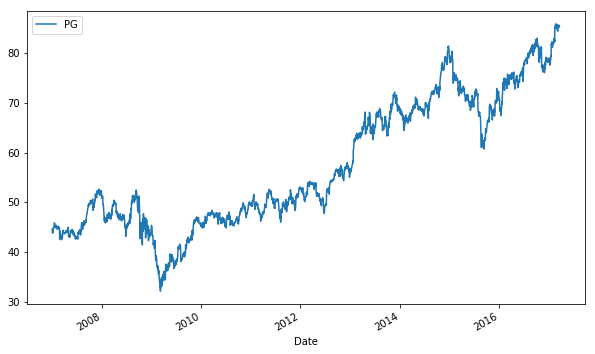

In [5]:
data.plot(figsize=(10, 6));

In [6]:
r = 0.025

In [7]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.176551
dtype: float64

In [8]:
type(stdev)

pandas.core.series.Series

In [9]:
stdev = stdev.values
stdev

array([0.17655059])

In [10]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals  
iterations = 10000  

In [11]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0 

for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [12]:
S

array([[ 85.41580963,  85.41580963,  85.41580963, ...,  85.41580963,
         85.41580963,  85.41580963],
       [ 85.4480524 ,  83.27942738,  85.63150731, ...,  86.2384888 ,
         87.20767476,  86.02316858],
       [ 84.54034579,  82.64234449,  86.31975552, ...,  84.2760411 ,
         88.14625262,  87.60115079],
       ...,
       [ 89.04253648,  47.9867871 , 102.72807376, ...,  65.14669742,
         73.3651953 ,  86.25413865],
       [ 89.84187746,  48.37726756, 103.36870414, ...,  65.37430038,
         73.6559986 ,  85.05219173],
       [ 89.68173225,  49.27082418, 103.18139804, ...,  66.374228  ,
         76.31018991,  85.2746644 ]])

In [13]:
S.shape

(251, 10000)

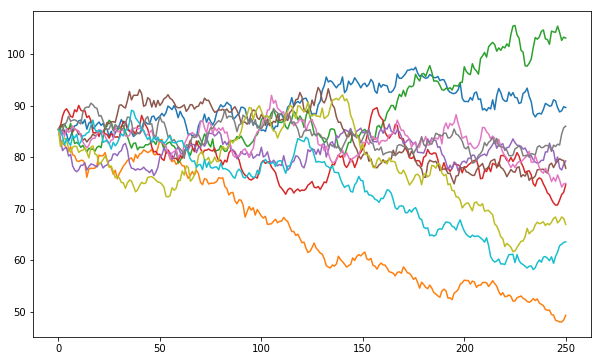

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

******

In [15]:
p = np.maximum(S[-1] - 110, 0)

In [16]:
p

array([0., 0., 0., ..., 0., 0., 0.])

In [17]:
p.shape

(10000,)

In [18]:
C = np.exp(-r * T) * np.sum(p) / iterations
C  

0.7582251242734769